# What are the top 10 countries for most reported deaths in each continent?


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bolkonsky/covid19")

print("Path to dataset files:", path)

Path to dataset files: /Users/macbook/.cache/kagglehub/datasets/bolkonsky/covid19/versions/1


In [23]:
import pandas as pd
from datasets import load_dataset
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/macbook/Covid_19_C_and_D_analysis/1_COVID-19_C_and_D/owid-covid-data.csv'
df = pd.read_csv(path)
df.copy()
df['date'] = pd.to_datetime(df['date'])


df['total_deaths'] = df['total_deaths'].fillna(0).astype(int)
df['total_cases'] = df['total_cases'].fillna(0).astype(int)



In [ ]:
df_continent_country = df.groupby(['continent', 'location'])[['total_deaths']].sum() # type: ignore
df_continent_country = df_continent_country.reset_index()
df_continent_country

,continent,location,total_deaths
0,Africa,Algeria,153685
1,Africa,Angola,6076
2,Africa,Benin,3155
3,Africa,Botswana,394
4,Africa,Burkina Faso,8467
...,...,...,...
205,South America,Paraguay,15122
206,South America,Peru,2039742
207,South America,Suriname,3827
208,South America,Uruguay,4628


In [ ]:
df_plot_Africa = df_continent_country[df_continent_country['continent'] == 'Africa'] 
df_plot_Asia = df_continent_country[df_continent_country['continent'] == 'Asia']
df_plot_North_America = df_continent_country[df_continent_country['continent'] == 'North America']
df_plot_Europe = df_continent_country[df_continent_country['continent'] == 'Europe']
df_plot_Oceania = df_continent_country[df_continent_country['continent'] == 'Oceania']
df_plot_South_America = df_continent_country[df_continent_country['continent'] == 'South America']

In [9]:
df_plot_Africa = df_plot_Africa.sort_values(by='total_deaths', ascending=False).head(10)
df_plot_Asia = df_plot_Asia.sort_values(by='total_deaths', ascending=False).head(10)
df_plot_North_America= df_plot_North_America.sort_values(by='total_deaths', ascending=False).head(10)
df_plot_Europe = df_plot_Europe.sort_values(by='total_deaths', ascending=False).head(10)
df_plot_South_America = df_plot_South_America.sort_values(by='total_deaths', ascending=False).head(10)
df_plot_Oceania = df_plot_Oceania.sort_values(by='total_deaths', ascending=False).head(10)

In [10]:
def annotate_bars(ax):
    for p in ax.patches:
        value = p.get_height()
        label = (
            f"{value/1_000_000:.1f}M" if value >= 1_000_000
            else f"{int(value/1000)}K" if value >= 1000
            else f"{int(value)}"
        )

        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

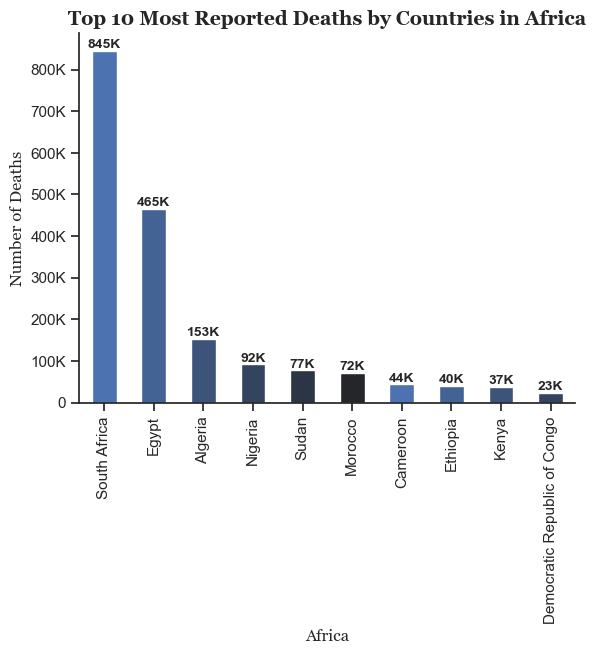

In [17]:
palette = sns.color_palette("dark:b_r", as_cmap=False)

df_plot_Africa.plot(kind='bar',
                    x='location', 
                    y='total_deaths', 
                    color=palette )

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
                  else f'{int(x/1000)}K' if x >= 1000 
                  else f'{int(x)}')
)

annotate_bars(ax)

plt.title('Top 10 Most Reported Deaths by Countries in Africa', 
          fontsize=14, 
          fontweight='bold',
          fontfamily='Georgia')
plt.ylabel('Number of Deaths',
           fontfamily='Georgia')
plt.xlabel('Africa',
           fontfamily='Georgia')
plt.legend().remove()
plt.show()

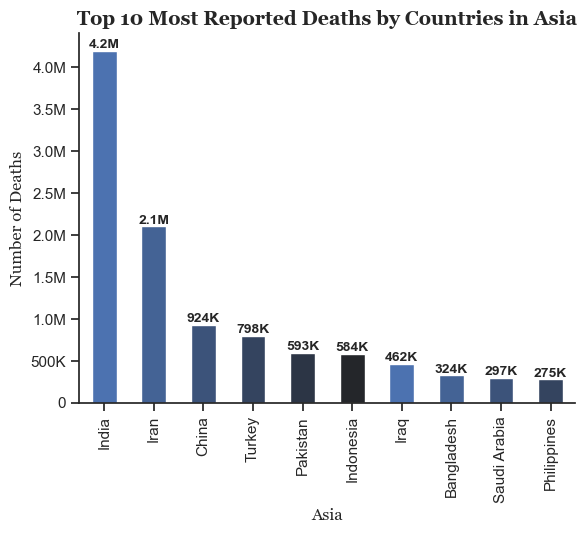

In [12]:
palette = sns.color_palette("dark:b_r", as_cmap=False)

df_plot_Asia.plot(kind='bar', 
                  x='location', 
                  y='total_deaths',
                  color=palette)

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
                  else f'{int(x/1000)}K' if x >= 1000 
                  else f'{int(x)}')
)

annotate_bars(ax)

plt.title('Top 10 Most Reported Deaths by Countries in Asia', 
          fontsize=14, 
          fontweight='bold',
          fontfamily='Georgia')
plt.ylabel('Number of Deaths',
           fontfamily='Georgia')
plt.xlabel('Asia',
           fontfamily='Georgia')
plt.legend().remove()
plt.show()

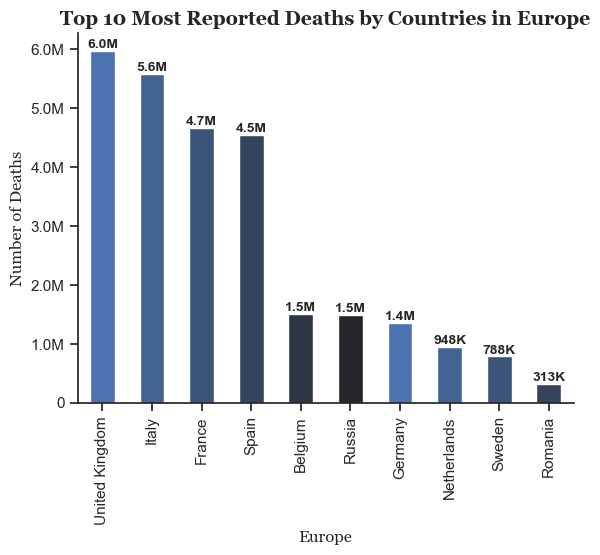

In [13]:
palette = sns.color_palette("dark:b_r", as_cmap=False)

df_plot_Europe.plot(kind='bar', 
                    x='location', 
                    y='total_deaths',
                    color=palette)

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
                  else f'{int(x/1000)}K' if x >= 1000 
                  else f'{int(x)}')
)

annotate_bars(ax)

plt.title('Top 10 Most Reported Deaths by Countries in Europe', 
          fontsize=14, 
          fontweight='bold',
          fontfamily='Georgia')
plt.ylabel('Number of Deaths',
           fontfamily='Georgia')
plt.xlabel('Europe',
           fontfamily='Georgia')
plt.legend().remove()
plt.show()

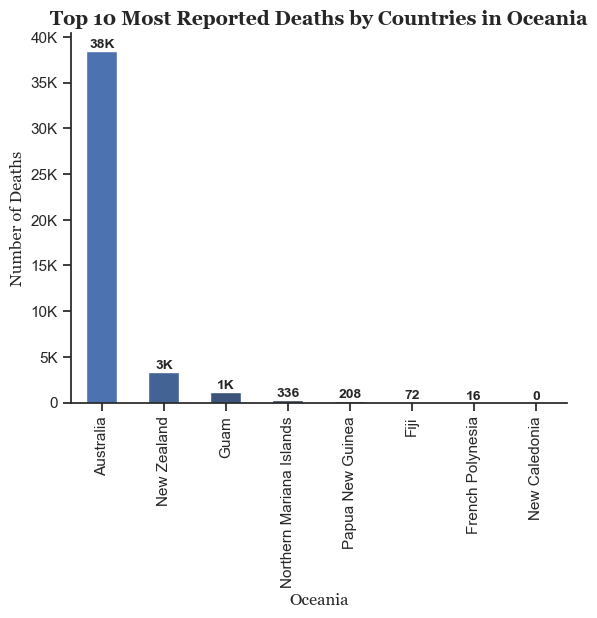

In [14]:
palette = sns.color_palette("dark:b_r", as_cmap=False)

df_plot_Oceania.plot(kind='bar', 
                     x='location', 
                     y='total_deaths',
                     color=palette)

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
                  else f'{int(x/1000)}K' if x >= 1000 
                  else f'{int(x)}')
)

annotate_bars(ax)

plt.title('Top 10 Most Reported Deaths by Countries in Oceania', 
          fontsize=14, 
          fontweight='bold',
          fontfamily='Georgia')
plt.ylabel('Number of Deaths',
           fontfamily='Georgia')
plt.xlabel('Oceania',
           fontfamily='Georgia')
plt.legend().remove()
plt.show()

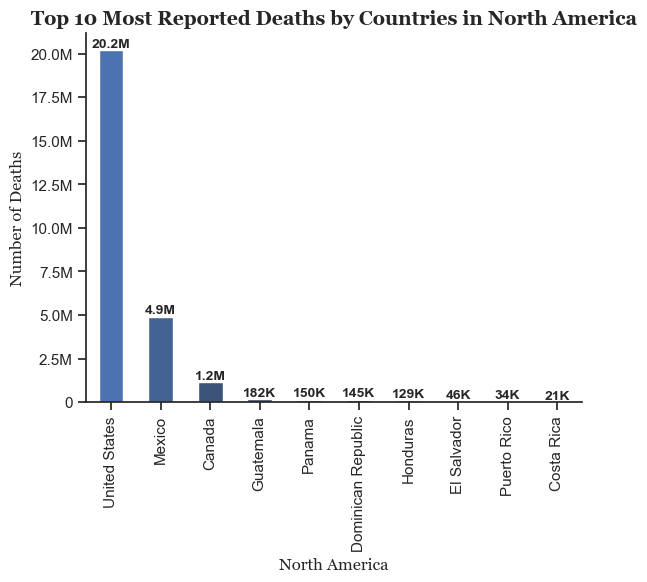

In [15]:
palette = sns.color_palette("dark:b_r", as_cmap=False)

df_plot_North_America.plot(kind='bar', 
                           x='location', 
                           y='total_deaths',
                           color=palette)

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
                  else f'{int(x/1000)}K' if x >= 1000 
                  else f'{int(x)}')
)

annotate_bars(ax)

plt.title('Top 10 Most Reported Deaths by Countries in North America', 
          fontsize=14, 
          fontweight='bold',
          fontfamily='Georgia')
plt.ylabel('Number of Deaths',
           fontfamily='Georgia')
plt.xlabel('North America',
           fontfamily='Georgia')
plt.legend().remove()
plt.show()

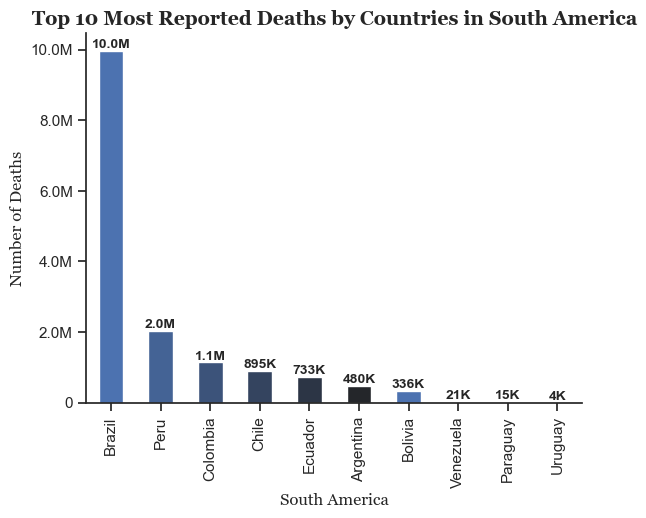

In [16]:
palette = sns.color_palette("dark:b_r", as_cmap=False)

df_plot_South_America.plot(kind='bar', 
                           x='location', 
                           y='total_deaths',
                           color=palette)

sns.despine()
sns.set_theme(style='ticks')

ax = plt.gca()
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 
                  else f'{int(x/1000)}K' if x >= 1000 
                  else f'{int(x)}')
)

annotate_bars(ax)

plt.title('Top 10 Most Reported Deaths by Countries in South America', 
          fontsize=14, 
          fontweight='bold',
          fontfamily='Georgia')
plt.ylabel('Number of Deaths',
           fontfamily='Georgia')
plt.xlabel('South America',
           fontfamily='Georgia')
plt.legend().remove()
plt.show()